In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('finaldf.csv')

In [3]:
df.head()

,Index No,Organization,Gender,Nationality,Hire Date,DS Location,DS Country,Family/Non-Family,Position_Count,Years of Service,...,Suspension,Temp Assignment,Termination,Transfer,Travel for Appointment,Travel for Re-Appointment,Unknown,Update(Local Staff),Performance_mean,Difference_incumbent
0,AAAAAZ,UNICEF,Male,Equatorial Guinea,2015-04-15,Bata,Equatorial Guinea,F,2,5,...,0,0,0,0,0,0,0,0,3.0,0
1,AAADK,UNICEF,Female,Cote d'Ivoire,2009-08-24,Man,Cote D'Ivoire,N,4,11,...,0,0,0,0,0,0,2,0,3.0,5
2,AAAKFZ,UNICEF,Female,Paraguay,2015-04-15,Asuncion,Paraguay,F,2,5,...,0,0,0,0,0,0,0,0,3.0,0
3,AAAKKD,UNDP,Male,Kenya,2008-03-13,Nairobi,Kenya,F,2,11,...,0,0,0,1,0,0,0,0,4.0,2
4,AAAKXX,UNICEF,Male,United Kingdom,2010-09-06,Beirut,Lebanon,F,1,10,...,0,0,0,0,0,0,0,0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15090 entries, 0 to 15089
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index No                        15090 non-null  object 
 1   Organization                    15090 non-null  object 
 2   Gender                          15090 non-null  object 
 3   Nationality                     15090 non-null  object 
 4   Hire Date                       15090 non-null  object 
 5   DS Location                     15090 non-null  object 
 6   DS Country                      15090 non-null  object 
 7   Family/Non-Family               15090 non-null  object 
 8   Position_Count                  15090 non-null  int64  
 9   Years of Service                15090 non-null  int64  
 10  Age                             15090 non-null  float64
 11  Hardship_min                    15090 non-null  float64
 12  Hardship_median                 

# Dummy variables 

In [5]:
# Drop unneccesary columns
mydf = df.drop(['Index No','Hire Date','DS Location','DS Country'], axis=1)

In [6]:
categories = mydf[['Organization', 'Gender', 'Nationality', 'Family/Non-Family']]

In [7]:
cat_dummy = pd.get_dummies(categories, drop_first = True)

In [8]:
mydf2 = mydf.drop(['Organization', 'Gender', 'Nationality', 'Family/Non-Family'], axis=1)
mydf3 = pd.concat([mydf2, cat_dummy], axis = 1)
mydf3.head()

,Position_Count,Years of Service,Age,Hardship_min,Hardship_median,Hardship_max,Min_Incumbent,Max_Incumbent,Add Contingent Worker,Additional Job,...,Nationality_Vanuatu,Nationality_Venezuela,Nationality_Viet Nam,Nationality_Vietnam,Nationality_Yemen,Nationality_Yemen Rep of,Nationality_Yugoslavia,Nationality_Zambia,Nationality_Zimbabwe,Family/Non-Family_N
0,2,5,34.5,4.0,4.0,4.0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,11,44.5,2.0,3.0,5.0,9,14,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,5,34.5,1.0,1.0,1.0,5,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,11,44.5,2.0,2.0,3.0,4,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10,44.5,2.0,2.0,2.0,15,15,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train/Test Split

In [9]:
# Independent variables
X = mydf3.drop('Performance_mean', axis = 1)

# Dependent variables
y = mydf3['Performance_mean']

In [10]:
y.unique()

array([3., 4., 2., 5., 1., 0.])

In [11]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([3, 3, 3, ..., 5, 3, 4])

In [12]:
from sklearn.model_selection import train_test_split
# Call train_test_split on X, y, test_size = 0.25, and random_state = 246
# Make new variables called X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)

# Target variable(performance rating) is imbalanced

Class=3, n=6405 (56.596%)
Class=4, n=3989 (35.248%)
Class=5, n=803 (7.096%)
Class=2, n=67 (0.592%)
Class=1, n=47 (0.415%)
Class=0, n=6 (0.053%)


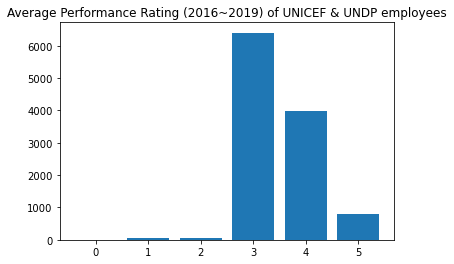

In [13]:
from collections import Counter
from matplotlib import pyplot


# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.title('Average Performance Rating (2016~2019) of UNICEF & UNDP employees')
pyplot.show()

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11317, 278)
(11317,)
(3773, 278)
(3773,)


# SMOTE for imbalanced dataset
- SMOTE should be applied only to the training dataset
- A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary. One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.
- By default, SMOTE will oversample all classes to have the same number of examples as the class with the most examples.
- Reference: 
https://machinelearningmastery.com/multi-class-imbalanced-classification/
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7

Class=3, n=6405 (16.667%)
Class=4, n=6405 (16.667%)
Class=5, n=6405 (16.667%)
Class=2, n=6405 (16.667%)
Class=1, n=6405 (16.667%)
Class=0, n=6405 (16.667%)


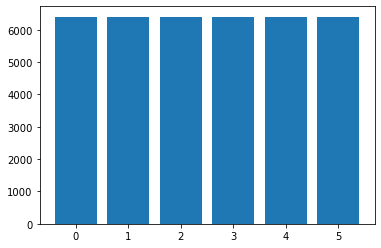

In [15]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

# summarize distribution
counter = Counter(y_train_sm)
for k,v in counter.items():
    per = v / len(y_train_sm) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [16]:
print(X_train_sm.shape)
print(y_train_sm.shape)
print(X_test.shape)
print(y_test.shape)

(38430, 278)
(38430,)
(3773, 278)
(3773,)


# Scale

In [17]:
#No need to scale the Y of train data 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_sm)
X_tr_scaled = scaler.transform(X_train_sm)
X_te_scaled = scaler.transform(X_test)

In [18]:
pd.DataFrame(X_tr_scaled, index = X_train_sm.index, columns = X_train_sm.columns).head()

,Position_Count,Years of Service,Age,Hardship_min,Hardship_median,Hardship_max,Min_Incumbent,Max_Incumbent,Add Contingent Worker,Additional Job,...,Nationality_Vanuatu,Nationality_Venezuela,Nationality_Viet Nam,Nationality_Vietnam,Nationality_Yemen,Nationality_Yemen Rep of,Nationality_Yugoslavia,Nationality_Zambia,Nationality_Zimbabwe,Family/Non-Family_N
0,0.0,0.275,0.50,0.6,0.6,0.8,0.352941,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.200,0.50,0.2,0.2,0.2,0.294118,0.277778,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.550,0.50,1.0,1.0,1.0,0.823529,0.777778,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.225,0.50,0.2,0.2,0.4,0.529412,0.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.075,0.25,0.6,0.8,0.8,0.294118,0.277778,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train/Test with RandomForestClassifier

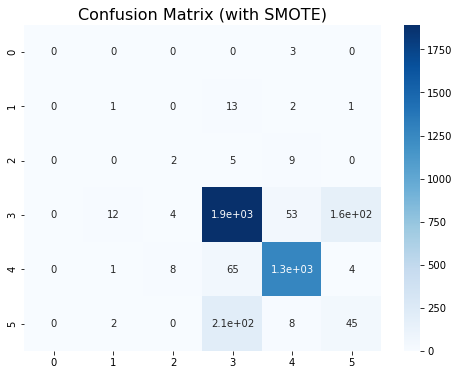

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_tr_scaled, y_train_sm)
y_pred = model.predict(X_te_scaled)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score

In [21]:
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print('Random Forest: recall-score=%.3f' % (recall))

Random Forest: Accuracy=0.850
Random Forest: f1-score=0.845
Random Forest: recall-score=0.850


30


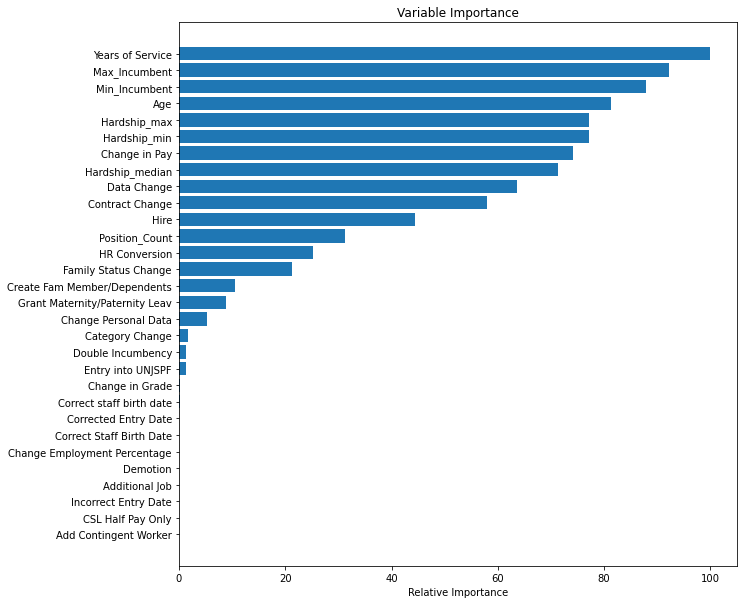

In [22]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Proportional Odds Logistic Regression for Ordered Category Outcomes
Handbook of Regression Modeling in People Analytics: 
https://peopleanalytics-regression-book.org/ord-reg.html


In [23]:
    
#pd.set_option('display.max_rows', 100)